In [6]:
from __future__ import division, print_function, absolute_import
from tqdm import tqdm
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from rbm import RBM
from rbm_original import RBMOriginal
import math
import Image
import sys
from tensorflow.python.ops import control_flow_ops
sys.path.append('/home/ajss/notebooks/deep-learning-projects/')
from utils import tile_raster_images
import IPython.display

%matplotlib inline


In [7]:
def next_batch(index,data,labels,batch_size=10):
    """Return the next `batch_size` examples from this data set."""
    total = data.shape[0]
    end = index + batch_size
    max_end =  max(0, index + batch_size - total)
    retData =  np.concatenate((data[index:end],data[:max_end]), axis=0)
    retlabel =  np.concatenate((labels[index:end],labels[:max_end]), axis=0)
    return retData,retlabel
def plot_gallery(title, images, n_col, n_row,image_shape = (28, 28)):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,            
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    plt.show()   
    
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

# read training data from CSV file 
dataTrain = pd.read_csv('./kaggle-mnist/train.csv')
images = dataTrain.iloc[:,1:].values
images = images.astype(np.float)
images = np.multiply(images, 1.0 / 255.0)

labels_flat = dataTrain[[0]].values.ravel()
labels_count = np.unique(labels_flat).shape[0]
# labels = dense_to_one_hot(labels_flat, labels_count)
labels = labels_flat #dense_to_one_hot(labels_flat, labels_count)
labels = labels.astype(np.uint8)

print(images.shape)
print(labels.shape)
# for i in range(4):
#     batch_xs, batch_ys = next_batch(i*10, images,labels)
#     plot_gallery('Base test Encoded_Decoded MNIST',batch_xs[:3],3,1)


(42000, 784)
(42000,)


In [8]:
# # read test data from CSV file 
# datatest = pd.read_csv('./kaggle-mnist/test.csv')
# imagestest = datatest.iloc[:,:].values
# imagestest = imagestest.astype(np.float)
# imagestest = np.multiply(imagestest, 1.0 / 255.0)


RBM
---------

In [9]:

flags = tf.app.flags
FLAGS = flags.FLAGS
# flags.DEFINE_string('data_dir', '/home/ajsss/data_deep/', 'Directory for storing data')


RBM-ONE LAYER ORIGINAL
-------

In [10]:

# # First RBM
rbmobject1_ = RBMOriginal(784, 1000, ['rbmw1', 'rbvb1', 'rbmhb1'],0.3)
# # Train First RBM
# # with tf.device("/job:RBMAJSS/task:0/cpu:0"):
epoch = 10
batch_size =30
interactions = int(math.floor(images.shape[0]/batch_size))
for i in tqdm(range(epoch)):
    for j in range(interactions):
        batch_xs, batch_ys = next_batch(j*batch_size, images,labels,batch_size)
        cost = rbmobject1_.partial_fit(batch_xs)
    print(rbmobject1_.compute_cost(images))
# rbmobject1_.save_weights('./rbmw1_Original.chp')



 10%|█         | 1/10 [00:11<01:46, 11.81s/it]

0.00835269


 20%|██        | 2/10 [00:23<01:33, 11.75s/it]

0.00736097


 30%|███       | 3/10 [00:35<01:21, 11.70s/it]

0.0067118


 40%|████      | 4/10 [00:46<01:10, 11.68s/it]

0.00665754


 50%|█████     | 5/10 [00:58<00:58, 11.66s/it]

0.00641692


 60%|██████    | 6/10 [01:09<00:46, 11.66s/it]

0.00606807


 70%|███████   | 7/10 [01:21<00:34, 11.65s/it]

0.00613096


 80%|████████  | 8/10 [01:33<00:23, 11.64s/it]

0.00606591


 90%|█████████ | 9/10 [01:44<00:11, 11.63s/it]

0.00590483


100%|██████████| 10/10 [01:56<00:00, 11.63s/it]

0.00573601


RBM-ONE LAYER ALVARO MODIFICATION
-------

In [11]:

# # First RBM
rbmobject1 = RBM(784, 1000, ['rbmw1', 'rbvb1', 'rbmhb1'],0.3,keep_prob=1.0)
# # Train First RBM
# # with tf.device("/job:RBMAJSS/task:0/cpu:0"):
epoch = 10
batch_size =30
interactions = int(math.floor(images.shape[0]/batch_size))
for i in tqdm(range(epoch)):
    for j in range(interactions):
        batch_xs, batch_ys = next_batch(j*batch_size, images,labels,batch_size)
        cost = rbmobject1.partial_fit(batch_xs)
    print(rbmobject1.compute_cost(images))
# rbmobject1.save_weights('./rbmw1_newALG.chp')


 10%|█         | 1/10 [00:12<01:50, 12.25s/it]

0.00809964


 20%|██        | 2/10 [00:24<01:37, 12.24s/it]

0.00725692


 30%|███       | 3/10 [00:36<01:25, 12.24s/it]

0.00669554


 40%|████      | 4/10 [00:48<01:13, 12.24s/it]

0.00654018


 50%|█████     | 5/10 [01:01<01:01, 12.25s/it]

0.00635666


 60%|██████    | 6/10 [01:13<00:48, 12.25s/it]

0.00625673


 70%|███████   | 7/10 [01:25<00:36, 12.25s/it]

0.0061225


 80%|████████  | 8/10 [01:37<00:24, 12.25s/it]

0.00611938


 90%|█████████ | 9/10 [01:50<00:12, 12.25s/it]

0.00610718


100%|██████████| 10/10 [02:02<00:00, 12.25s/it]

0.00600669


batch_xs.T
(784, 30)


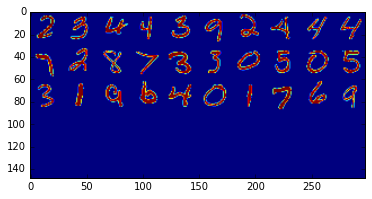

In [12]:
plt.figure()
print('batch_xs.T')
print(np.transpose(batch_xs).shape)
imagex = Image.fromarray(tile_raster_images(batch_xs,
                                           img_shape=(28, 28),
                                           tile_shape=(5, 10),
                                           tile_spacing=(2, 2)))
#         imagex.show()
plt.imshow(imagex)

(30, 784)
xk1.T


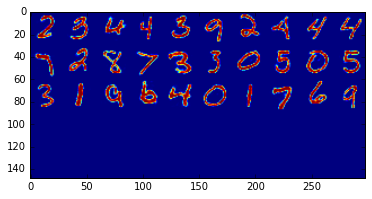

In [13]:

image_reconstruct =  rbmobject1.reconstruct(batch_xs)
print(image_reconstruct.shape)
plt.figure()
print('xk1.T')
imagexk = Image.fromarray(tile_raster_images(image_reconstruct,
                                           img_shape=(28, 28),
                                           tile_shape=(5, 10),
                                           tile_spacing=(2, 2)))
#         imagexk.show()
plt.imshow(imagexk)

W.T
(1000, 784)


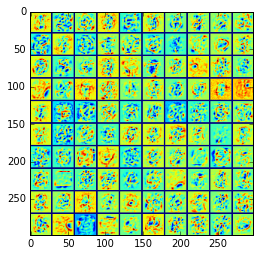

In [30]:
print('W.T')
plt.figure()
print(rbmobject1.return_hidden_weight_as_np().T.shape)
image = Image.fromarray(tile_raster_images(rbmobject1.return_hidden_weight_as_np().T,
                                           img_shape=(28, 28),
                                           tile_shape=(10, 10),
                                           tile_spacing=(2, 2)))
plt.imshow(image)

RBM-ONE LAYER NO DROPOUT
-------

In [32]:
from rbm import RBM

# # First RBM
rbmobject_nodropout = RBM(784, 1000, ['rbmw1', 'rbvb1', 'rbmhb1'],0.3,keep_prob=1.0)
# # Train First RBM
epoch = 10
batch_size =30
interactions = int(math.floor(images.shape[0]/batch_size))
for i in tqdm(range(epoch)):
    for j in range(interactions):
        batch_xs, batch_ys = next_batch(j*batch_size, images,labels,batch_size)
        cost = rbmobject_nodropout.partial_fit(batch_xs)
    print(rbmobject_nodropout.compute_cost(images))
# rbmobject_nodropout.save_weights('./rbmw1_newALG.chp')




 10%|█         | 1/10 [00:12<01:51, 12.41s/it]

0.00819325


 20%|██        | 2/10 [00:24<01:39, 12.39s/it]

0.00695515


 30%|███       | 3/10 [00:37<01:26, 12.37s/it]

0.00678605


 40%|████      | 4/10 [00:49<01:14, 12.36s/it]

0.00647773


 50%|█████     | 5/10 [01:01<01:01, 12.36s/it]

0.006404


 60%|██████    | 6/10 [01:14<00:49, 12.35s/it]

0.00627252


 70%|███████   | 7/10 [01:26<00:36, 12.33s/it]

0.00630338


 80%|████████  | 8/10 [01:38<00:24, 12.33s/it]

0.00603943


 90%|█████████ | 9/10 [01:51<00:12, 12.34s/it]

0.00605927


100%|██████████| 10/10 [02:03<00:00, 12.33s/it]

0.0060298


RBM-ONE LAYER DROPOUT
-------

In [35]:

# # First RBM
rbmobject_dropout = RBM(784, 1000, ['rbmw1', 'rbvb1', 'rbmhb1'],0.3,keep_prob=0.9)
# # Train First RBM
# # with tf.device("/job:RBMAJSS/task:0/cpu:0"):
epoch = 10
batch_size =30
interactions = int(math.floor(images.shape[0]/batch_size))
for i in tqdm(range(epoch)):
    for j in range(interactions):
        batch_xs, batch_ys = next_batch(j*batch_size, images,labels,batch_size)
        cost = rbmobject_dropout.partial_fit(batch_xs)
    print(rbmobject_dropout.compute_cost(images))
# rbmobject_dropout.save_weights('./rbmw1_Original.chp')
print(rbmobject_dropout.compute_cost(images))


 10%|█         | 1/10 [00:12<01:50, 12.29s/it]

0.00998859


 20%|██        | 2/10 [00:24<01:38, 12.29s/it]

0.00956398


 30%|███       | 3/10 [00:36<01:25, 12.28s/it]

0.00977095


 40%|████      | 4/10 [00:49<01:13, 12.27s/it]

0.00964378


 50%|█████     | 5/10 [01:01<01:01, 12.28s/it]

0.00970995


 60%|██████    | 6/10 [01:13<00:49, 12.28s/it]

0.00994633


 70%|███████   | 7/10 [01:25<00:36, 12.28s/it]

0.00978711


 80%|████████  | 8/10 [01:38<00:24, 12.28s/it]

0.00991145


 90%|█████████ | 9/10 [01:50<00:12, 12.26s/it]

0.00975565


100%|██████████| 10/10 [02:02<00:00, 12.26s/it]

0.0101215


0.0101215
